<a href="https://colab.research.google.com/github/shylesharepelly/learn_DataScience/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import csv
import math
import warnings
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


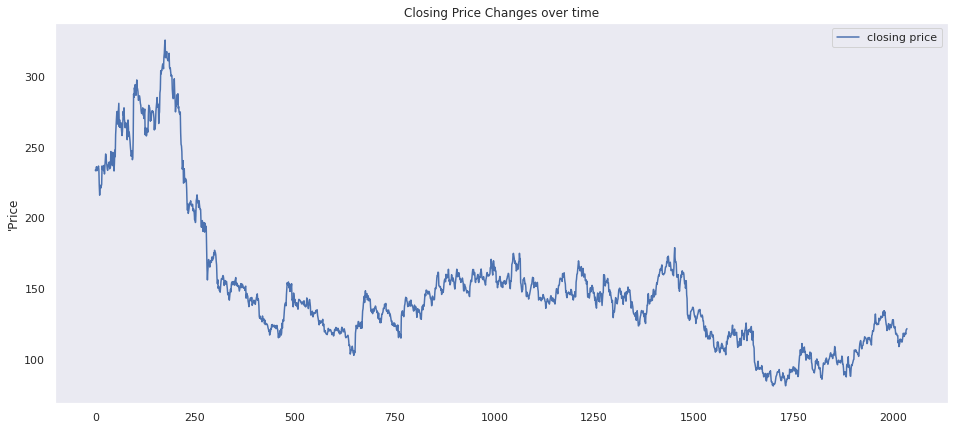

In [12]:
plt.figure(figsize=(10,6))
data['Close'].plot(kind='line',figsize=(16,7),c='b',label='closing price')

plt.ylabel("'Price")
plt.legend(loc="upper right")
plt.title("Closing Price Changes over time")
plt.grid()

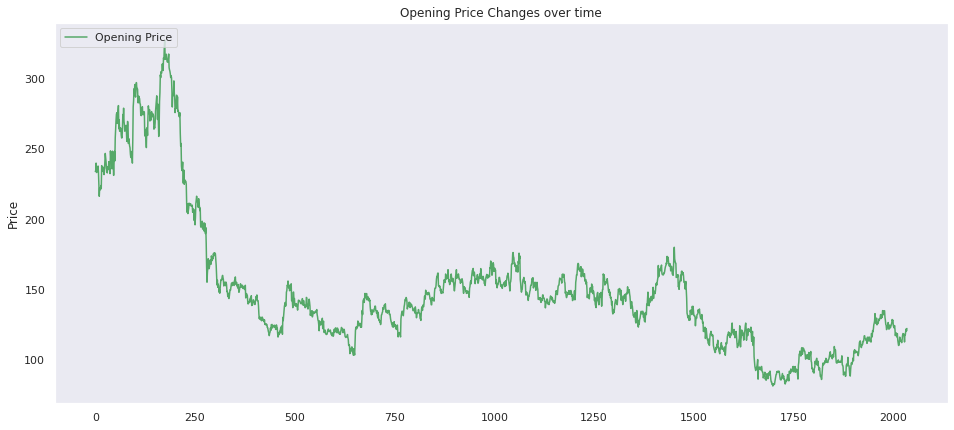

In [13]:
plt.figure(figsize=(10,6))
data["Open"].plot(kind='line',figsize=(16,7),c='g',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Opening Price Changes over time")
plt.grid()

In [14]:
df_close=data['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
training_set=data['Open']
training_set

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set=scaler.fit_transform(np.array(df_close).reshape(-1,1))
training_set

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [17]:
train_size=int(len(training_set)*0.75)
test_size=int(len(training_set))-train_size
train_data,test_data=training_set[0:train_size,:],training_set[train_size:len(data),:1]
train_size

1526

In [18]:
def create_dataset(dataset,time_step=1):
  datax=[]
  datay=[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [19]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [20]:
print(x_train.shape,y_train.shape)

(1425, 100) (1425,)


In [21]:
print(x_test.shape,y_test.shape)

(408, 100) (408,)


In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(y_train.shape)

(1425, 100, 1)
(1425,)


In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics="acc")

In [24]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [25]:

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 10s 195ms/step - loss: 0.0309 - acc: 7.0175e-04 - val_loss: 0.0017 - val_acc: 0.0025
Epoch 2/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0023 - acc: 7.0175e-04 - val_loss: 7.5484e-04 - val_acc: 0.0025
Epoch 3/100
23/23 [==============================] - 5s 205ms/step - loss: 0.0012 - acc: 7.0175e-04 - val_loss: 6.1260e-04 - val_acc: 0.0025
Epoch 4/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0010 - acc: 7.0175e-04 - val_loss: 7.4831e-04 - val_acc: 0.0025
Epoch 5/100
23/23 [==============================] - 4s 154ms/step - loss: 9.9908e-04 - acc: 7.0175e-04 - val_loss: 7.3020e-04 - val_acc: 0.0025
Epoch 6/100
23/23 [==============================] - 5s 225ms/step - loss: 9.6436e-04 - acc: 7.0175e-04 - val_loss: 7.3665e-04 - val_acc: 0.0025
Epoch 7/100
23/23 [==============================] - 4s 156ms/step - loss: 9.4330e-04 - acc: 7.0175e-04 - val_loss: 7.9345e-04 - val_acc: 0.0025
Epoc

In [26]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 1s 47ms/step


In [27]:
train_predict=scaler.inverse_transform(train_data)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.86377726244002

In [30]:
look_back=100
trainPredictPlot=np.empty_like(training_set)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict


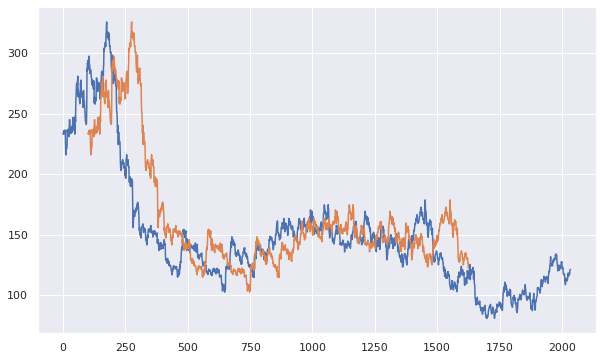

In [31]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(training_set))
plt.plot(trainPredictPlot)
plt.show()